In [22]:
#SALES PREDICTION USING PYTHON
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import joblib

In [23]:
#LOAD DATA
data = pd.read_csv('advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [24]:
#EXPLORATORY DATA ANALYTICS
#DISPLAY FIRST FEW ROWS
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [25]:
#BASIC INFO OF DATA
print("Basic information about the dataset:")
print(data.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [26]:
#SUMMARY STATISTICS
print("Summary statistics of the dataset:")
print(data.describe(include='all'))

Summary statistics of the dataset:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [27]:
#FIND MISSING VALUES
print("Number of missing values per column:")
print(data.isnull().sum())

Number of missing values per column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


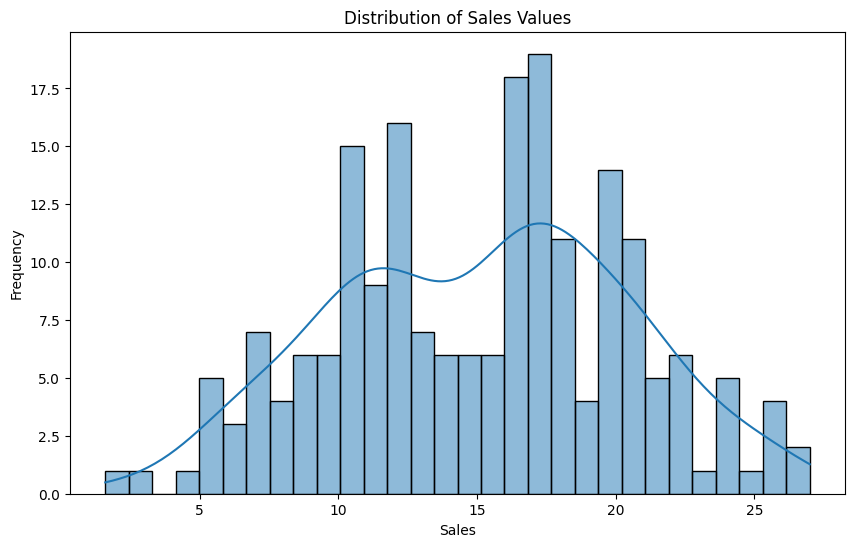

In [28]:
# Visualize the distribution of sales values
if 'Sales' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Sales'].dropna(), kde=True, bins=30)
    plt.title('Distribution of Sales Values')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Sales' not found in the dataset.")


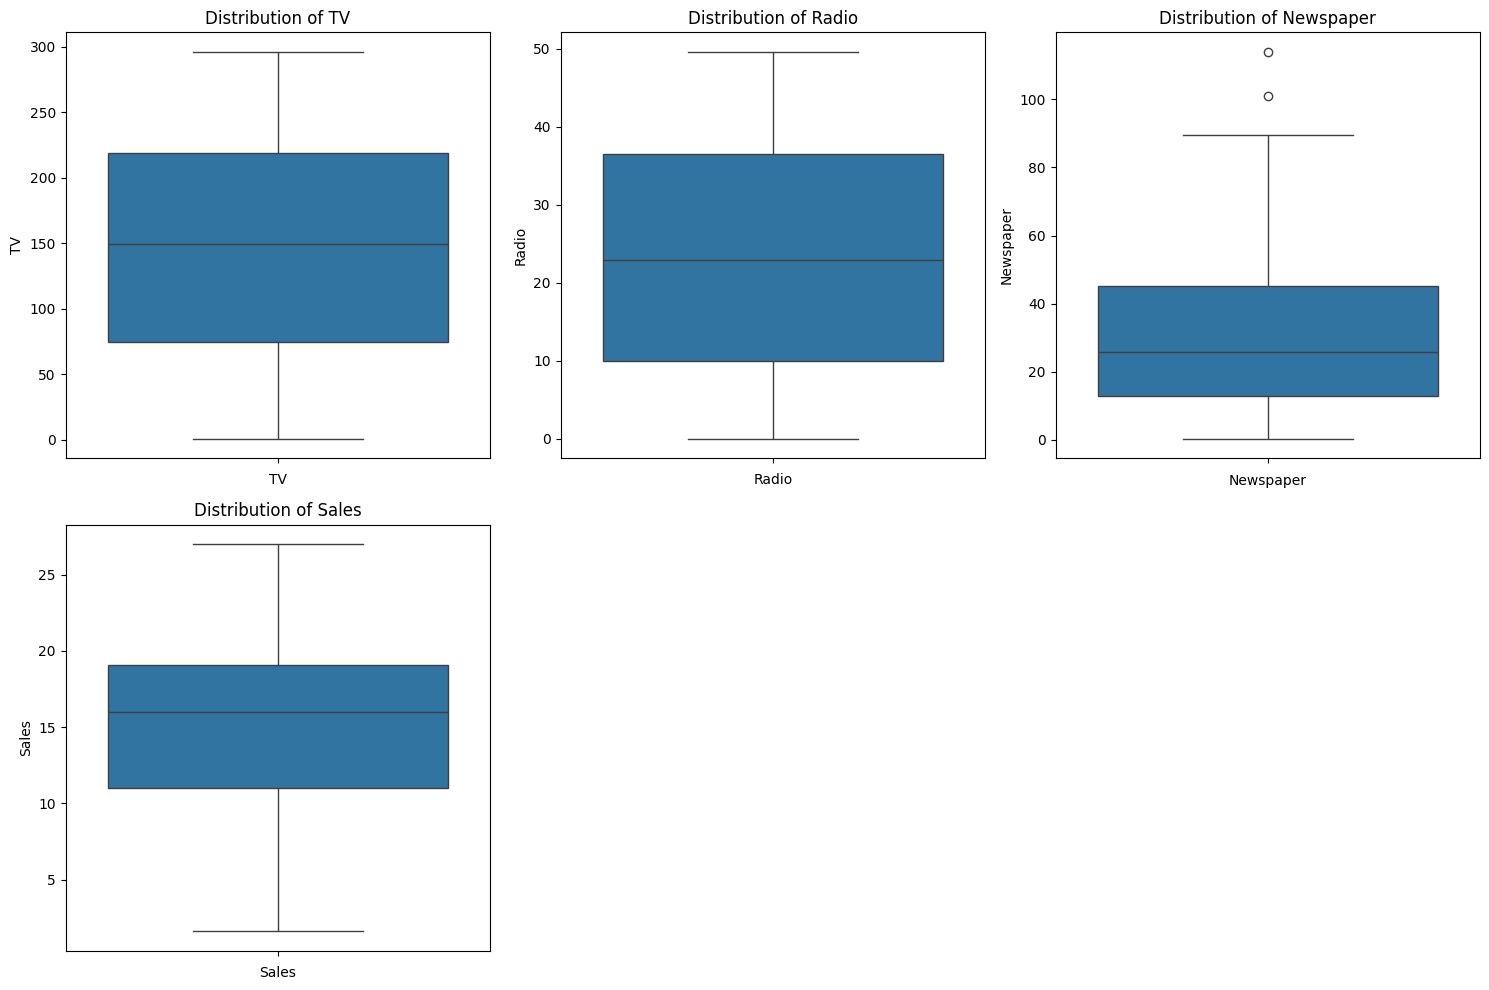

In [29]:
# Visualize the distribution of numerical features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

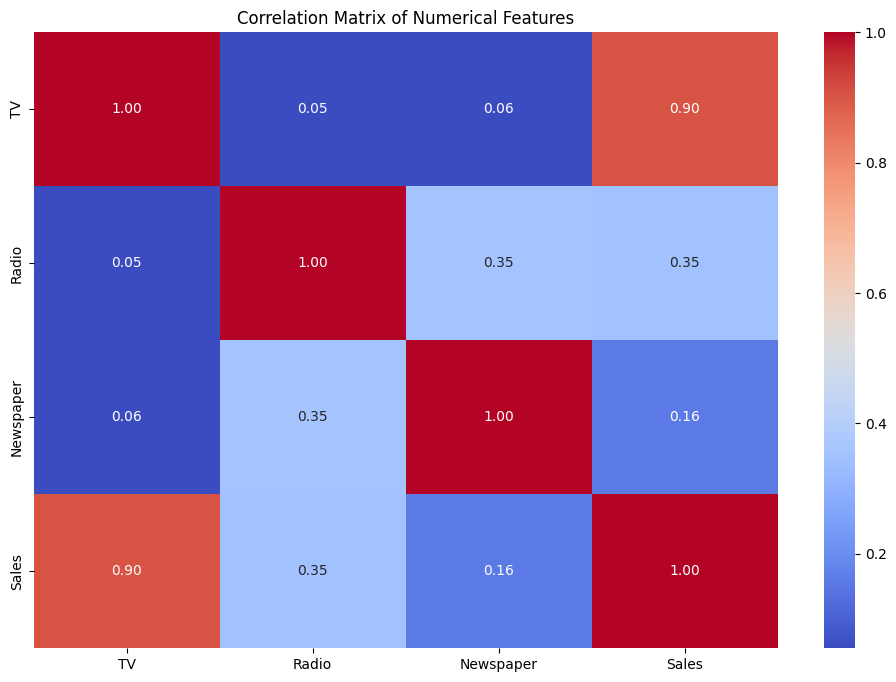

In [30]:
# Visualize the correlation matrix of numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

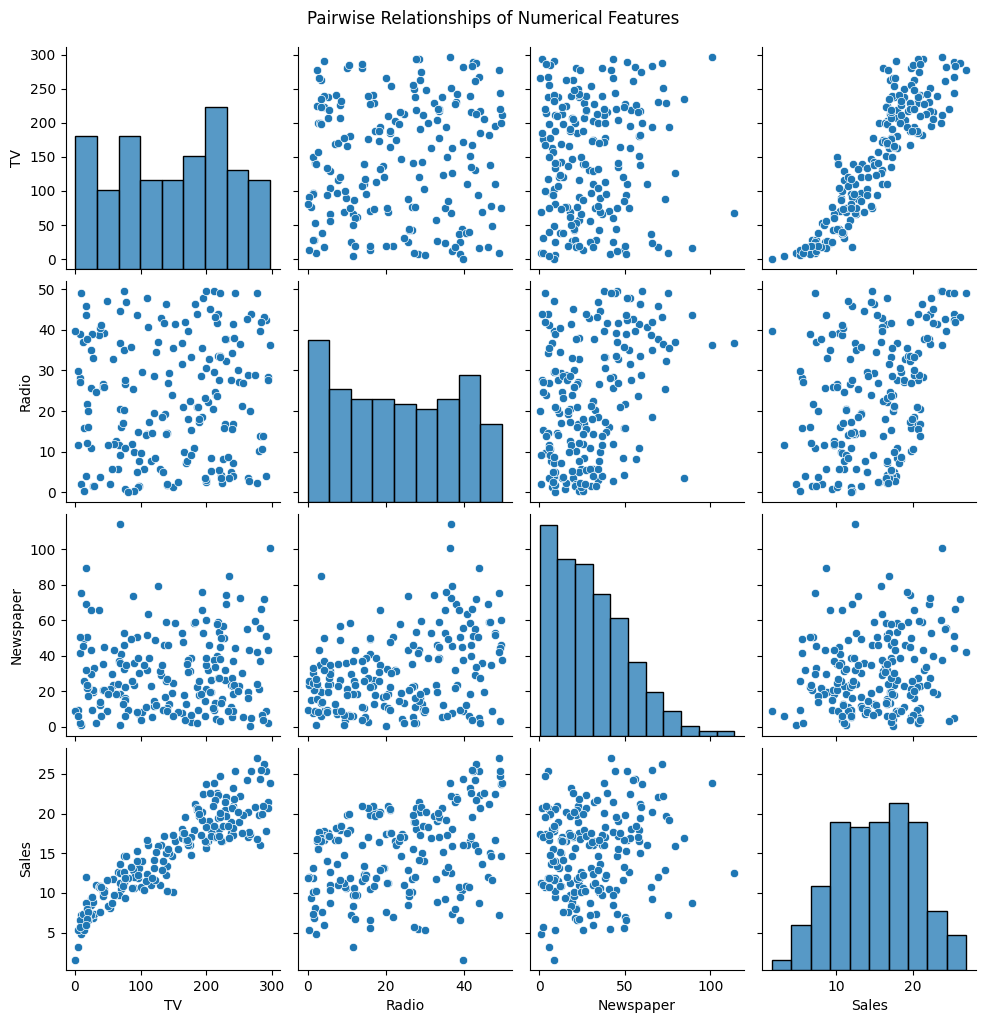

In [31]:
# Visualize pairwise relationships between numerical features
sns.pairplot(data[numeric_features])
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
plt.show()

In [32]:
#DATA PREPROCESSING
# Split data into features and target variable
X = data.drop('Sales', axis=1)
y = data['Sales']

In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
#BUILDING AND TRAINING MODEL
#TRAIN THE MODEL
# LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [36]:
#EVALUATING MODEL
#MODEL PERFORMANCE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression - MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}')

Linear Regression - MSE: 2.91, MAE: 1.27, R2: 0.91


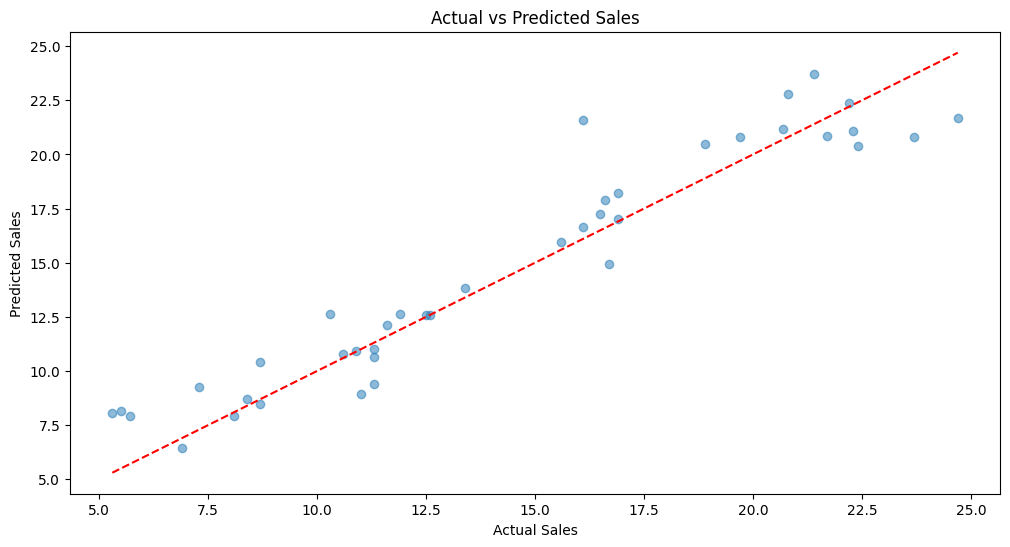

In [37]:
#VISUALIZATION
# Visualization of predictions vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

In [38]:
#SAVE AND LOAD MODEL
# Save the model
joblib.dump(model, 'sales_prediction_model.pkl')

['sales_prediction_model.pkl']

In [39]:
# Load and use the model
loaded_model = joblib.load('sales_prediction_model.pkl')

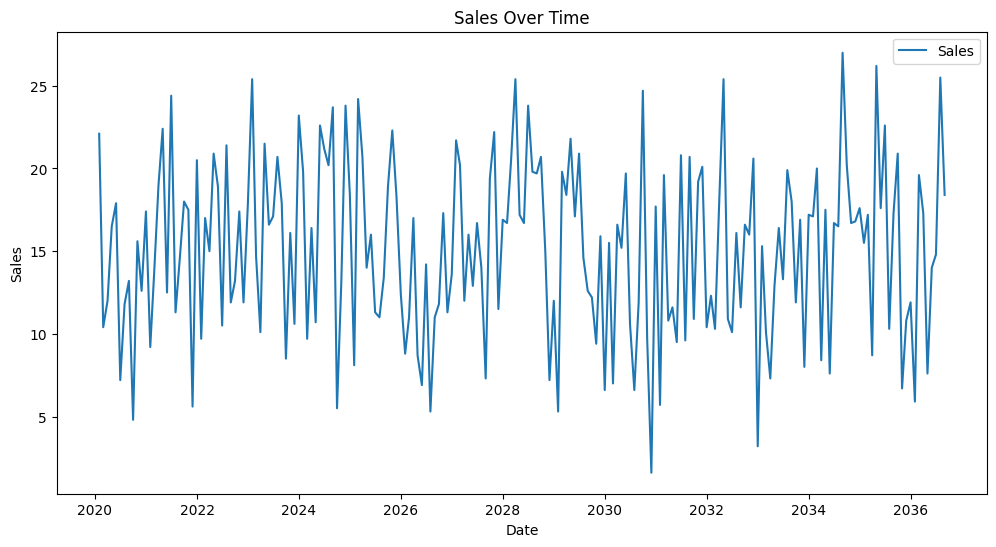

In [40]:
#ADDITIONAL EDA
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    plt.figure(figsize=(12, 8))
    data.set_index('Date')['Sales'].plot()
    plt.title('Sales Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()
else:
    # Generate synthetic date range and plot sales over time
    dates = pd.date_range(start='2020-01-01', periods=len(data), freq='M')
    data['Date'] = dates
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Sales'], label='Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title('Sales Over Time')
    plt.legend()
    plt.show()